<a href="https://colab.research.google.com/github/UMassIonTrappers/quantum-computing-labs/blob/main/Lab_02_Measurement_Basis%2C_Spatial_quantization_and_the_Stern_Gerlach_Exp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 550/650 QC

## Introduction to Quantum Computing

Robert Niffenegger (rniffenegger@umass.edu )

---


Introduction to quantum computation will cover:
Quantum optics, wave particle duality and single particle interference and coherence of photons. Interaction of light and matter, atomic physics, atomic states, and transitions.
Survey of qubit modalities: photonics, neutral atoms, trapped ions, Transmons.
Single qubit control: Rabi oscillations, Bloch Sphere, Ramsey pulses, spin echoes.
Entanglement generation: photons, trapped ions, Bell states.
Quantum Circuits and Algorithms: Grover, Deutsch, Shor

### Labs will be every Friday

Initial programs will be simulations of single qubit operations such as Rabi and Ramsey pulse sequences and then entanglement of two qubits and bell state generation. This will allow us to construct quantum circuits from fundamental quantum mechanical interactions, effectively seeing into the ‘black box’ of quantum circuits. Finally, in the second half of the course we will program simulations of quantum algorithms by Grover and Shor using the Qiskit and QuTIP python libraries.


### Textbook
>Quantum Computation and Quantum Information , Authors:	Michael A. Nielsen, Isaac L. Chuang


##Supporting Materials:

### Quantum Optics:

•	Ivan H. Deutsch’s Notes
http://info.phys.unm.edu/~ideutsch/Classes/Phys566F21/

•	Daniel Steck’s Notes
https://atomoptics.uoregon.edu/~dsteck/teaching/quantum-optics/

###Quantum Computation:

•	Thomas Wong’s Textbook:
https://www.amazon.com/Introduction-Classical-Quantum-Computing-Thomas-dp-B09QP2MYYM/dp/B09QP2MYYM/

http://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e.pdf

•	IBM’s Qiskit Textbook - https://qiskit.org/textbook-beta


#How to use this Notebook

1. Create a copy for you to edit and update the filename with your UMass username.

1. Runtime > Run all (Ctrl + F9) - required to load all of the libraries, some of which need to be installed into the cloud.

1. Turn on the table of contents to easily navigate the long notebook.

1.  Experiment! This notebook is just a starting point for you to explore. If you have ideas for things to try start by typing out the pseduo code first then see if you can find help to get the syntax and libraries to make it work.

1. Teamwork. Working in teams will help everyone check their code and debug errors. Please work in groups of up to three people. You may all share code but please maintain your own copy of the notebook to turn in for credit.

1. Hand written paper notebook still recommended. This colab notebook is a supplement to a paper notebook and the textbooks listed above. To test out ideas, check mathematical relations and linear algebra proofs and to complete exercises you will need a real physical paper notebook to do your work. Please have one and a pen/pencil handy.

Related: Be careful not to get bogged down in the code if it is not working. Reach out to your team, the TA or me to get assistance.

Programming Resources:
  *   https://colab.research.google.com/notebooks/basic_features_overview.ipynb
  *   https://www.dataquest.io/blog/jupyter-notebook-tutorial/
  *   https://www.youtube.com/watch?v=inN8seMm7UI
  *   https://nbviewer.ipython.org/github/qutip/qutip-notebooks/blob/master/examples/qubit-dynamics.ipynb
  * FYI: Colab provides hardware acceleration with GPUs and TPUs if you go to 'Runtime>Change Runtime type'




# QuTiP

All labs will be run in the colaboratory Jupyter notebook like this one.

To get started we first need to install the Quantum Toolbox in Python (QuTiP) using 'pip' within Colab.

(Any library not native to Colab can be installed this way.)

In [1]:
try:
  import qutip; print(qutip.__version__)
except ImportError:
  print('Install Qutip')
  !pip install qutip
  import qutip; print(qutip.__version__)

5.0.4


In [2]:
'''New library from Qutip https://arxiv.org/pdf/2105.09902v2.pdf '''
!pip install --quiet qutip-qip

#Qiskit

IBM's Quantum Information Software Kit

In [3]:
try:
  import qiskit; print(qiskit.__version__)
except ImportError:
  print('Install Qiskit')
  !pip install -q qiskit
  !pip install -q qiskit[visualization]

try:
  from qiskit_aer import QasmSimulator
  print('Qiskit Aer imported');
except ImportError:
  print('Install Qiskit-Aer')
  !pip install --quiet qiskit-aer
  from qiskit import QuantumCircuit, transpile, assemble
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit_aer import QasmSimulator

1.3.2
Qiskit Aer imported


Matplotlib (Library) - MATLAB like plotting for python

In [4]:
# '''
# If plots of the Bloch sphere are not working you may have to revert the matplotlib back to 3.4.0

# Qutip doesn't work with matplotlib 3.5
# Qiskit doesn't work with matplotlib 3.4.3

# Requires uninstall and then install of matplotlib.__version__ == '3.4.0'

# '''

# try:
#   import matplotlib
#   print(matplotlib.__version__)
# except ImportError:
#   print('Install Matplotlib')

# if matplotlib.__version__ > '3.4.0':
#   print ("Need to downgrade matplotlib to work with Qutip and Qisket")
#   !pip uninstall matplotlib
#   !pip install matplotlib==3.4.0
#   import matplotlib ;  print(matplotlib.__version__)

In [5]:
# '''
# Kaleidoscope plots Bloch spheres for Qisket
# '''
# try:
#   import kaleidoscope
# except ImportError:
#   print('Install kaleidoscope')
#   !pip install -q kaleidoscope
# import kaleidoscope; print(kaleidoscope.__version__)

Initialize and import libraries

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, sin, cos
from numpy import random
plt.style.use('dark_background') #background

#QUTIP
import qutip as qt
from qutip import *
from qutip.qip import *
from qutip import qeye, tensor, destroy, fock_dm

#QISKIT
from qiskit.quantum_info import Statevector


Coding preamble complete


#Quantum States - review

In lecture we discussed how the possible paths of photons can be thought of as qubit states, where a beamsplitter can put a photon into a superposition of taking two paths at once.

Critically, these two paths interfere, for **single** photons.

> https://en.wikipedia.org/wiki/Linear_optical_quantum_computing#Elements_of_LOQC

## Spin 1/2 systems

Another very important physical representation of a qubit is the spin of the electron which can be 'up' or 'down'.
So instead of a photon being in a superposition of taking both path A *and* path B. The electron can take a path where it experiences being spin 'up' and a path where it experiences being spin 'down'.

path A or path B $ ⇒  \langle \uparrow | $ or $ \langle ↓| $

Like the path of the photon, when we interfere these paths together we get only one output. Instead of the single photon being required to come out of either port 1 or port 2 of the final beam splitter, the electron must end up in spin up or spin down. This is because like a photon, the electron behaves like a wave eventhough it is a particle.

$|{\uparrow} \rangle = |0 \rangle = \begin{pmatrix}{1}\\{0}\end{pmatrix}=\left\vert {s_{z}{=}{+\textstyle {\frac {1}{2}}}}\right\rangle $

$|{\downarrow} \rangle = |1\rangle = \begin{pmatrix}{0}\\{1}\end{pmatrix}
=\left\vert {s_{z}{=}{-\textstyle {\frac {1}{2}}}}\right\rangle $

(https://en.wikipedia.org/wiki/Spin-1/2)


## 'Bra-Ket' notation (aka Dirac Notation)

With column vectors represented by 'kets' $|0⟩ = \begin{pmatrix}{1}\\{0}\end{pmatrix}$

and 'bras' representing row vectors $ ⟨0| = \begin{pmatrix}1 & 0 \end{pmatrix}$


 ### Dagger operator †  (note on complex numbers)

When turning a 'bra' into a 'ket' and (vice versa) transpose and take the complex conjugate. This 'adjoint' operation is represented by a 'dagger' †.  Outer products for example require † operators not just transpose.


## The Bloch Sphere

State vectors can be plotted in 3D on a unit sphere.

Like the probability of a particle existing always being one, the radius of the sphere will be 1 just like the unit circle in 2D.

### The up state:

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


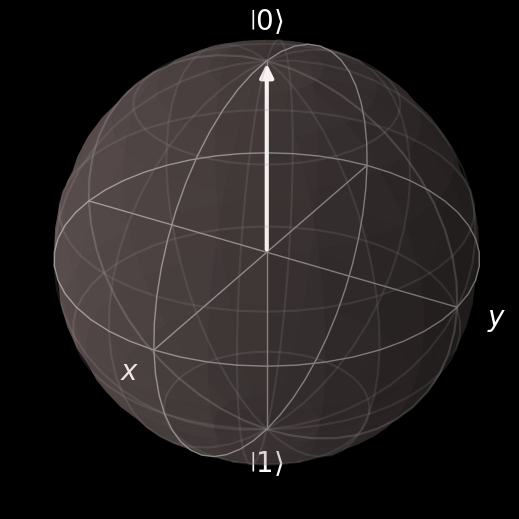

In [8]:
psi0 = spin_state( 1/2, +1/2) # Initialize the 'up' state
print(psi0)

'''
plot with Qutip
'''
import qutip as qt

b = qt.Bloch() #create Bloch sphere
b.font_color = 'white'

b.add_states(psi0) # add our quantum state to the sphere
b.vector_color = 'white'

b.show() # plot the sphere with the quantum state

## Coupling states (transitions)

To construct an operator that can flip any state (|0⟩ to |1⟩ AND |1⟩ to |0⟩) we add the outer product |1⟩⟨0|.

$|0⟩⟨1| = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix}0 &  1\end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}$

$|0⟩⟨1| + |1⟩⟨0|= \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \sigma_x$

## The X operator is logically equivalent to a NOT operation on the qubit state.
 It flips the qubit from 1 to 0 or 0 to 1.
 Physically it flips the spin from up to down and down to up! It is the single qubit X gate.


## Single qubit gate (X gate)

X gate (aka 'NOT') gate on a qubit

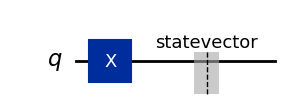

In [9]:
'''
Single qubit gate with Qiskit
'''
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector

'''Quantum Circuit'''
# Create a Quantum register with 1 qubit
qc = QuantumCircuit(1)

# Add an X gate on qubit_0
qc.x(0)

'''Setup Simulation'''
qc.save_statevector() #Measure Statevector

# Draw the circuit
qc.draw('mpl') #colorful drawing

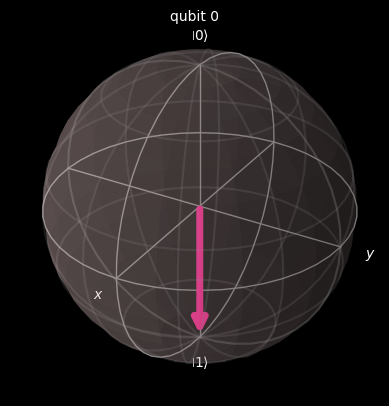

In [10]:
from qiskit.visualization import plot_bloch_multivector

'''Simulate Quantum Circuit'''

QasmSim = QasmSimulator() #Set simulator to evolve state

job_sim = QasmSim.run(qc, shots=1) #run one shot for statevector
result_sim = job_sim.result() #save results

'''Get the statevector from result'''
statevector = result_sim.get_statevector(qc)

'''Plot result on the Bloch sphere'''
plot_bloch_multivector(statevector)

##Pauli Matrices and rotations about the Bloch Sphere
\begin{aligned}
\sigma _{x}={\begin{pmatrix}0&1\\1&0\end{pmatrix}},\quad \sigma _{y}={\begin{pmatrix}0&-i\\i&0\end{pmatrix}},\quad \sigma _{z}={\begin{pmatrix}1&0\\0&-1\end{pmatrix}}
\end{aligned}

The rotations of the Bloch sphere about the Cartesian axes in the Bloch basis are then given by:

\begin{aligned}R_{x}(\theta )&=e^{(-i\theta X/2)}=\cos(\theta /2)I-i\sin(\theta /2)X={\begin{bmatrix}\cos \theta /2&-i\sin \theta /2\\-i\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{y}(\theta )&=e^{(-i\theta Y/2)}=\cos(\theta /2)I-i\sin(\theta /2)Y={\begin{bmatrix}\cos \theta /2&-\sin \theta /2\\\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{z}(\theta )&=e^{(-i\theta Z/2)}=\cos(\theta /2)I-i\sin(\theta /2)Z={\begin{bmatrix}e^{-i\theta /2}&0\\0&e^{i\theta /2}\end{bmatrix}}\end{aligned}



## Bloch Sphere vs. Unit Circle

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]


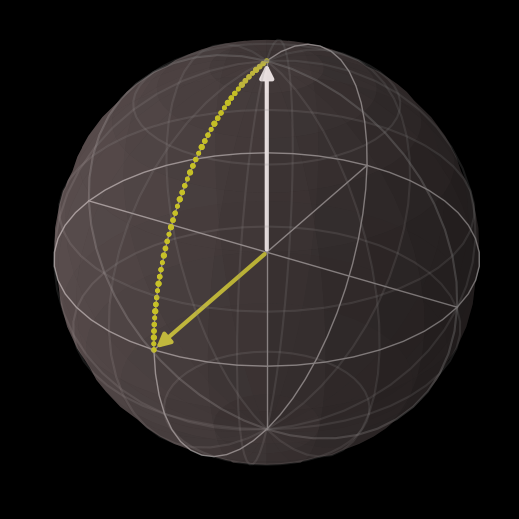

In [11]:
from qutip.qip.operations import rx, ry, rz


b = Bloch() #create Bloch sphere
# b.font_color = 'white'
b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']

# Initialize the 'down' state
psi0 = spin_state( 1/2, +1/2)
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Twice as much rotation about the Bloch Sphere
Rotation = pi*1/2

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation about Y axis
  psi1 = ry(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1)
print(psi1)

b.render()
b.show()


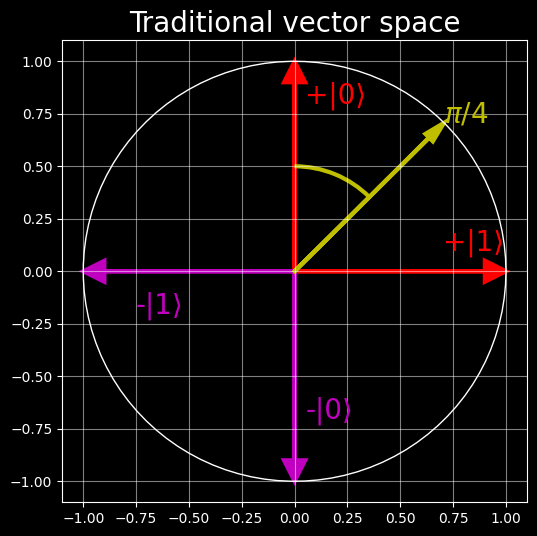

In [12]:

'''
Setup a Unit Circle plot
'''
# plt.figure(figsize=(6,6)) #Create figure for plot
fig , ax  = plt.subplots(figsize=(6,6))
x = np.linspace(0,2*np.pi,100) # circle perimeter
plt.plot(np.cos(x),np.sin(x),'w', linewidth= 1) #plot circle
plt.grid(alpha=.5)
plt.style.use('dark_background') #background
plt.title('Traditional vector space',fontsize=20)
# ax.set_ylabel('|0>', fontsize=20)
# ax.set_xlabel('|1>', fontsize=20)
plt.arrow(0,0,1,0, linewidth=3,head_width=0.1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
plt.arrow(0,0,0,1, linewidth=3,head_width=0.1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
plt.arrow(0,0,0,-1, linewidth=3,head_width=0.1, head_length=0.1, fc='m', ec='m', length_includes_head = 1)
plt.arrow(0,0,-1,0, linewidth=3,head_width=0.1, head_length=0.1, fc='m', ec='m', length_includes_head = 1)
plt.text(0.05,0.8,'+|0⟩',c='r',fontsize=20)
plt.text(0.7,0.1,'+|1⟩',c='r',fontsize=20)
plt.text(+0.05,-0.7,'-|0⟩',c='m',fontsize=20)
plt.text(-0.75,-0.20,'-|1⟩',c='m',fontsize=20)

'''
Plot rotation on a traditional unit circle
'''
psi_circle = 0

# Traditional rotation on unit circle
Rotation = pi*1/4

# Rotate
psi_circle = psi_circle + Rotation

#Plot vector
plt.arrow(0,0,np.sin(psi_circle),np.cos(psi_circle), linewidth=3,head_width=0.05, head_length=0.1, fc='y', ec='y', length_includes_head = 1)
plt.text(np.sin(psi_circle),np.cos(psi_circle),'$\pi/4$',c='y',fontsize=20)

#plot arc of rotation
import matplotlib.patches as mpatches
pac = mpatches.Arc([0, 0], 1, 1, angle=0, theta1=90-Rotation*180/pi, theta2=90, linewidth=3, color = 'y')
ax.add_patch(pac)

# ax.axis([-2, 2, -2, 2])
# ax.set_aspect("equal")
# fg.canvas.draw()

plt.show()
fig.savefig('uc_pio4.png')


# from IPython.display import Image
# Image('uc_pio4.png')

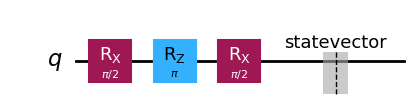

In [13]:
'''
Single qubit gates circuit with Qiskit
'''
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector

'''Quantum Circuit'''
# Create a Quantum register with 1 qubit
qc = QuantumCircuit(1)

# Add an X(pi/2) gate on qubit_0
qc.rx(pi/2,0)

# Add an Z(pi) gate on qubit_0
qc.rz(pi,0)

# Add an X(pi/2) gate on qubit_0
qc.rx(pi/2,0)

'''Setup Simulation'''
qc.save_statevector() #Measure Statevector

# Draw the circuit
qc.draw('mpl') #colorful drawing

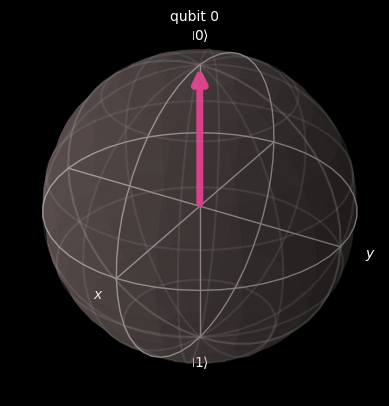

In [14]:
from qiskit.visualization import plot_bloch_multivector

'''Simulate Quantum Circuit'''
QasmSim = QasmSimulator() #Set simulator to evolve state
job_sim = QasmSim.run(qc, shots=1) #run one shot for statevector
result_sim = job_sim.result() #save results

'''Get the statevector from result'''
statevector = result_sim.get_statevector(qc)

'''Plot result on the Bloch sphere'''
plot_bloch_multivector(statevector)

# Lab 2


#Measurement of spin 1/2 system - quantization axis

The two spin states of the electron are created by the inherent quantized magnetic dipole moment of the electron referred to as the Bohr magneton.

${\displaystyle \mu _{\mathrm {B} }={\frac {e\hbar }{2m_{\mathrm {e} }}}}$

In the presence of an external magnetic field the electron aligns it's 'up/down' axis (a vector in real space) with the magnetic field vector of external field $\vec{B}$ . Simliar to how a bar magnet would orient itself with the earths magnetic field to minimize the local magnetic field and thus minimize the energy stored in the magnetic field.

However, unlike a bar magnet, the electron is only ever up or down due to the quantization of the electron spin. So the electron is never 'sideways' or partially up/down.

### It is quantized either up or down.

However, this doesn't mean that it can't have equal probabilities of being in the up state and down state, a superposition state. As we'll see the electron can have an equal probability of being up and down before we measure it ***but*** once we measure it, it is either up or it is down and if we measure it again (in the same manner) we expect to get the same result again and again. This was confirmed by the famous, Stern-Gerlach experiment.

>There are indeed many 'two-level' quantum systems like this and almost all qubits rely on the ability to confine quantum systems to just two 'paths' or states per qubit. For all of them the general rules that follow are the same.



# Superposition review

What does the vector represent when it is rotated somewhere between up and down?

The state vector Ψ represents a superposition of the basis states $|\uparrow⟩$ and $|\downarrow⟩$.

$|Ψ⟩ = α |\uparrow ⟩ + β |\downarrow⟩ $

We can parametrize the state in terms of this angle from pole to pole (theta = $θ$ ) where:

$α = \cos (θ/2) ~,~  β = \sin ( θ/2)$

Constrained by $θ$ only going to $π$ : $( 0 ≤ θ ≤ π )$ .

>(Remember that this is why rotation back to the top of the Bloch sphere actually brings us to the negative projection of the original basis state, not back to the original state). As soon as we go past π the projection to the other state (β) decreases and the projection to the original state (α) begins increasing again.

Parameterized the state vector becomes:

$Ψ = \cos (\frac{θ}{2}) |\uparrow⟩ + \sin ( \frac{θ}{2}) |\downarrow⟩ $

To be complete we must also include a relative phase between the two states represented by that rotation angle about the Z axis $ϕ$ where $( 0 ≤ ϕ ≤ 2π )$ :

$Ψ = \cos (\frac{θ}{2}) |\uparrow⟩ + e^{iϕ} \sin ( \frac{θ}{2}) |\downarrow⟩ $

## Equal superposition states

As an example imagine we rotate a state vector so it is entirely along the 'X' axis (by giving it a quarter turn about the Y axis for instance).

Then it will be in an equal superposition of the basis states such that $α = β$.

For this to be true the total probability of the state existing must be normalized to 1. Requiring that $⟨Ψ|Ψ⟩=1$.

In which case $α = β = \frac{1}{\sqrt{2}}$ and

$|Ψ⟩ = α |\uparrow⟩ + β |\downarrow⟩ = \frac{1}{\sqrt{2}}( |\uparrow⟩ + |\downarrow⟩ )$

> Verify that $⟨Ψ|Ψ⟩=1$, for $|Ψ⟩ = \frac{1}{\sqrt{2}}( |\uparrow⟩ + |\downarrow⟩ )$


Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]


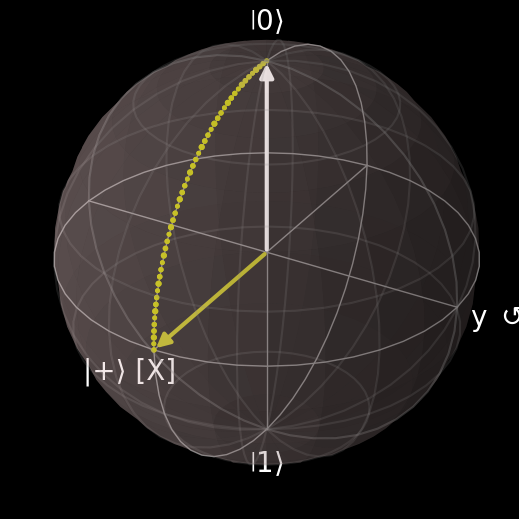

In [17]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
b.ylabel = ['y $ \circlearrowleft $', '']
b.xlabel = ['|+⟩ [X]', '']

# Initialize the 'down' state
psi0 = spin_state( 1/2, +1/2)
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Twice as much rotation about the Bloch Sphere
Rotation = pi*1/2

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation ( rx, ry, rz )
  psi1 = ry(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1)
print(psi1)

b.show()

### The |+⟩ state in the X basis
This vector is composed of 1/2 of the up state vector and 1/2 of the down state vector with the same sign.

$|+⟩ = \frac{1}{\sqrt{2}}  ( |0⟩ + |1⟩ )$

It is in an equal superposition of the up and down state.
The square root ensures that $⟨+|+⟩=1$

> Check $⟨+|+⟩=1~~$, (i.e. $~\frac{1}{\sqrt{2}}  ( ⟨0| + ⟨1| ) * \frac{1}{\sqrt{2}}  ( |0⟩ + |1⟩ ) = ? $)


---


Next:
If we rotate |+⟩ around Z (or Y) to the other side of the Bloch sphere what vector do we get?


Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[4.32978028e-17-0.70710678j]
 [4.32978028e-17+0.70710678j]]


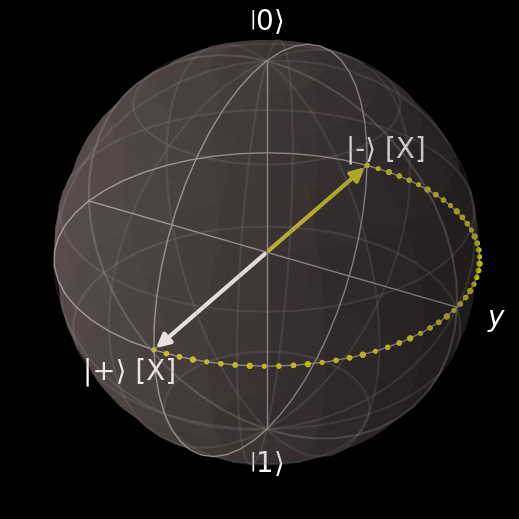

In [18]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']

# Initialize the 'x+' state
x = (basis(2,0)+(1+0j)*basis(2,1)).unit()
print(x)
b.add_states(x)

# Twice as much rotation about the Bloch Sphere
Rotation = pi*1

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation ( rx, ry, rz )
  psi1 = rz(Rotation*delta[i]) * x

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1)
print(psi1)

b.show()

### The |-⟩ state in the X basis
This vector is also composed of 1/2 of the up state and 1/2 of the down state but now they are out of phase with each other so one is always negative of the other.

$|-⟩_x = \frac{1}{\sqrt{2}}  ( |0⟩ - |1⟩ )$

What happens when we rotate this state about the X axis?


Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.70710678]
 [-0.70710678]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 4.32978028e-17+0.70710678j]
 [-4.32978028e-17-0.70710678j]]


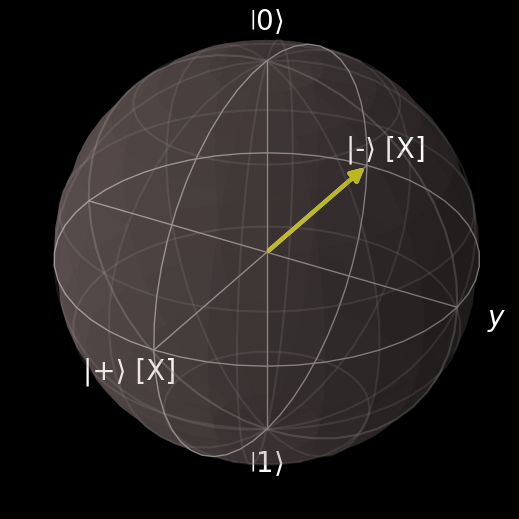

In [21]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y','y'] #set color of initial and final vectors
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']

x_minus = (basis(2,0)-(1+0j)*basis(2,1)).unit()
print(x_minus)
b.add_states(x_minus)

#Apply rotation
psi1 = rx(pi*1) * x_minus
print( psi1 )
b.add_states(psi1)

b.show()

The global phase of the state changed but the relative phase of the superposition did not.

>Exercise: Create a new cell. Next create a state that is not a pure |-⟩ and rotate it about the X axis.

In [ ]:
'''
For Exercise
'''




'\nFor Exercise\n'

##Superposition of X basis back to Z basis

What happens now if we create an equal super position of the |+⟩ and |-⟩ states?

$ \frac{|+⟩ \scriptsize{+} \normalsize |-⟩}{\sqrt{2}}= \frac{|0⟩ + |1⟩}{2}  + \frac{|0⟩ - |1⟩}{2}  = |0⟩ $


##We get |0⟩ ,  the Z 'plus' state!
This is very interesting. Remember we constructed |+⟩ and |-⟩ states in the X basis from |0⟩ + |1⟩ states in the Z basis.

We created a superposition of the Z basis states that was:

* in-phase to create $|+⟩$ ⇒ $\frac{|0⟩ + |1⟩}{\sqrt 2} = |+⟩$
* out-of-phase to create $|-⟩$ ⇒ $\frac{|0⟩ - |1⟩}{\sqrt 2} = |-⟩$

We now find that if we want to get back to the Z basis from the X basis, we exactly reverse the process:

 * adding |+⟩ and |-⟩ (in-phase) gives ⇒ $\frac{|+⟩ \scriptsize{+} \normalsize |-⟩}{\sqrt 2} = |0⟩$


*  subtracting  |+⟩ and |-⟩ (out of phase)  gives ⇒ $\frac{|+⟩ \scriptsize{-} \normalsize |-⟩}{\sqrt 2} = -|1⟩$

 $-|1⟩$ is along negative Z **and** has a global phase!

It is extremely important to recognize:

##**All basis states can be decomposed as a superposition of the other basis states.**

This is exactly what is demonstrated by the Stern–Gerlach Experiment (#2)
(https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment#Experiment_2)

The Stern-Gerlach experiment is a fundamental experiment in Quantum physics history. It showed that the orientation of spin is quantized, even if from a seemingly random source. Further, it showed that if a 'beam' of up spins in one basis is subsequently measured in a different basis that it splits into two equal beams. Just like we showed with $\frac{|+⟩ \scriptsize{+} \normalsize |-⟩}{\sqrt{2}}= |0⟩$ but in reverse! There are many instances of this in quantum physics for various other two level quantum systems.

Light polarization for instance behaves in a similar fashion, with vertical and horizontal polarizations both being equal superpositions of left and right handed circularly polarized light. This will be important once we discuss atoms later.

> Exercise : How do we decompose the -|1⟩ state into the X basis states |+⟩ and |-⟩ ?

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.70710678]
 [-0.70710678]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


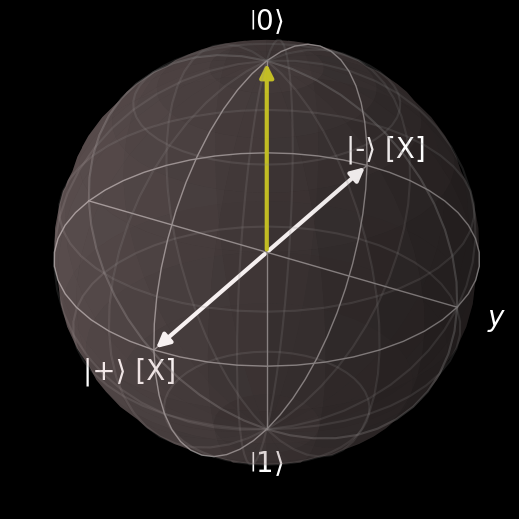

In [23]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','w','y'] #set color of initial and final vectors
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']

'''
Create X+ and X- states
'''
x_plus = (basis(2,0)+(1+0j)*basis(2,1)).unit()
x_minus = (basis(2,0)-(1+0j)*basis(2,1)).unit()

print(x_plus)
b.add_states(x_plus)
print(x_minus)
b.add_states(x_minus)

'''
Super position |+⟩ + |-⟩ normalized = |0⟩
'''
psi1 = (x_plus + x_minus).unit()
print( psi1 )
b.add_states(psi1)

b.show()

>Execise: Go back and plot the super position of |+⟩ and |-⟩ without normalizing.

Reminder of the 'Z' basis states

$|{\uparrow} \rangle = |0 \rangle = \begin{bmatrix}{1}\\{0}\end{bmatrix}=\left\vert {s_{z}{=}{+\textstyle {\frac {1}{2}}}}\right\rangle $

$|{\downarrow} \rangle = |1\rangle = \begin{bmatrix}{0}\\{1}\end{bmatrix}
=\left\vert {s_{z}{=}{-\textstyle {\frac {1}{2}}}}\right\rangle $


##Basis along Y

Finally we can also define the basis along the 'Y' direction.
They are also orthogonal to each other.
We can represent this new vector in terms of the original Z basis.

$|+i⟩ =\frac{1}{\sqrt{2}} (|0⟩  + i|1⟩)$

$|-i⟩ =\frac{1}{\sqrt{2}} (|0⟩  - i|1⟩)$

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


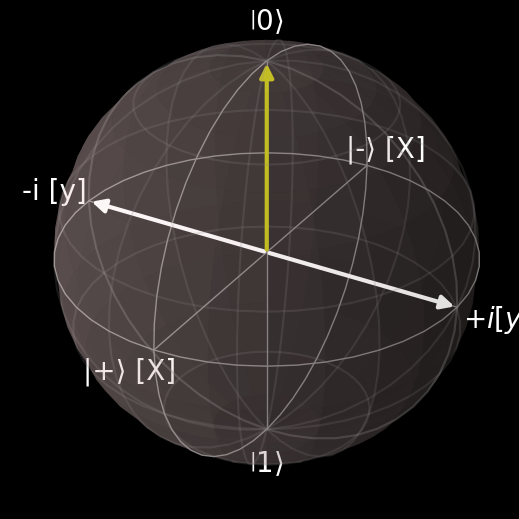

In [25]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','w','y'] #set color of initial and final vectors
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']
b.ylabel = ['$+i [y]$', '-i [y]']

y_plus = (basis(2,0)+(0+1j)*basis(2,1)).unit()
b.add_states(y_plus)
print(y_plus)

y_minus = (basis(2,0)-(0+1j)*basis(2,1)).unit()
b.add_states(y_minus)
print(y_minus)

#Superposition in phase
psi1 = (y_plus + y_minus).unit()

b.add_states(psi1)
print(psi1)
b.show()


#Superposition of Y basis states

We again see that an in phase superposition of |+i⟩ + |-i⟩  = |0⟩ and an out of phase superposition of |+i⟩ - |-i⟩  = |1⟩

So not only are the original Z basis states superpositions of the |+⟩,|-⟩ basis states (along X) but also simultaneously of the basis states |+i⟩,|-i⟩ along y.

But how do we check? We must measure!

#State Measurement

Measurement is an important concept in quantum mechanics. Imagine that we want to measure the qubit state after a rotation to verify that we have rotated it to another state. What do we **expect** to measure (what is the expectation value)?

We know quantum states are quantized. An electron can only ever be in one state or the other and a photon can only ever be in one cavity or the other. However, it can have a probability of being in both one *and* the other before we measure it.

It is like a coin that can only be heads or tails once it falls (never landing on edge) but while it is in the air has some probability of being both. If the qubit is 'flipped' into an equal superposition of up and down (like a coin) it will be up 50% of the time and down 50% of the time but it can only ever land heads/tails (up/down).

On the Bloch sphere we can see that the probability of being in each state is related to the projection of the state vector along the z axis. If the state (vector) is pointing up then it is more likely to be measured up. If it is pointing down then down. And if it is sideways (no component in the z direction) then it is in an equal superposition of up and down.

However, we need some observable or measureable value to determine which state we were in. For the electron this observable is the spin. The spin project operator is :

$S_z = \frac{\hbar}{2} \sigma _z  = \frac{\hbar}{2}  \begin{pmatrix}
1&0\\ 0&-1 \end{pmatrix} $

It projects the state onto the Z basis and multiplies by ±ħ/2 depending on the state. Now the superposition tells us the probability that we'll get ±ħ/2.

For spin down:

$S_z |\Psi_0⟩ = \frac{\hbar}{2} \sigma _{z} |\downarrow ⟩ = \frac{\hbar}{2}  {\begin{pmatrix}1&0\\0&-1\end{pmatrix}} \begin{pmatrix}{0}\\{1}\end{pmatrix} = \frac{\hbar}{2} [(1 * 0) + (0*1) + (0 * 0) + (-1 * 1)] = -\frac{\hbar}{2}  $


###Pauli Matrices:

If we want to measure along other bases we'd have to use the other Pauli matrices.

$\sigma _{x}={\begin{pmatrix}0&1\\1&0\end{pmatrix}},\quad \sigma _{y}={\begin{pmatrix}0&-i\\i&0\end{pmatrix}},\quad \sigma _{z}={\begin{pmatrix}1&0\\0&-1\end{pmatrix}}$

###Measurement trials (repeating for statistics)

So now if we create a superposition state:
$|+⟩ = \frac{1}{\sqrt{2}}  ( |0⟩ + |1⟩ )$

We can measure it and repeat the process 100 times.
How many times do we get up and down?

First we need to be very explicit about how we are going to measure it. If we create an equal superposition of the basis states along Z (|0⟩ and |1⟩), then we'll only get an equal probability of measuring ±ħ/2 if we measure along Z.
(If we measure along X we will **always** get +ħ/2.)



## Measure |+⟩ along Z:

{1.0: 54, -1.0: 46}


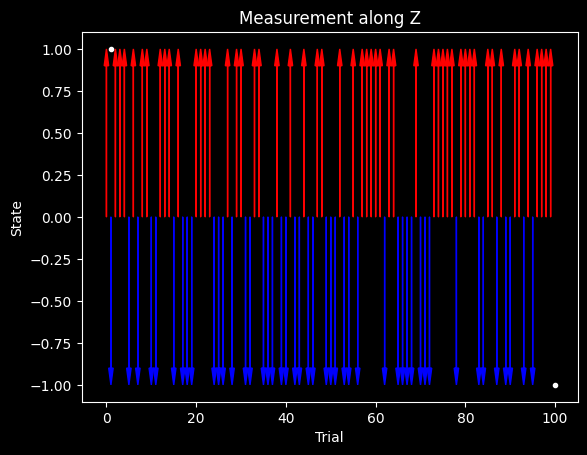

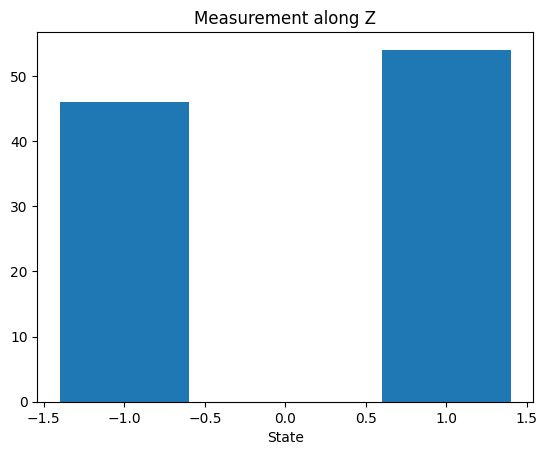

In [26]:
from qutip.measurement import measure, measurement_statistics

trials = 100

# Prepare |+X⟩ state
psi1 = (basis(2,0) + basis(2,1) ).unit()

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')
plt.style.use('default')


for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure.
  Here the state is psi1 and the basis is along Z.
  '''
  value, new_state = measure(psi1, sigmaz())
  results[round(value)] += 1
  if value > 0:
    # axes.plot(i, value,'.r')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    # axes.plot(i, value,'.b')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along Z')
plt.ylabel('State')
plt.xlabel('Trial')

#Autoscale axes by manually plotting farthest extent of plot
axes.plot(1, 1,'.w')
axes.plot(trials, -1,'.w')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along Z')
plt.xlabel('State')
plt.show()

## Measure |+⟩ along X:

{1.0: 100, -1.0: 0}


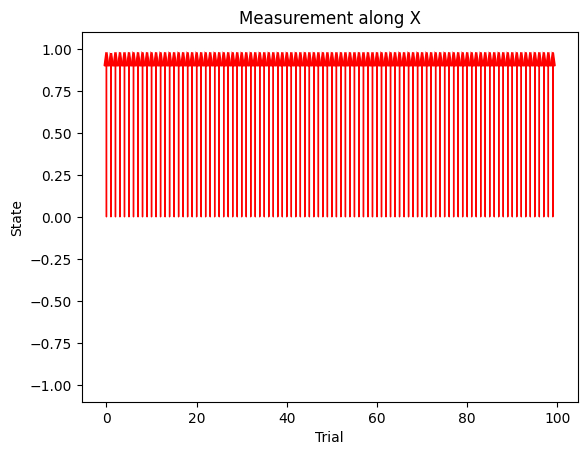

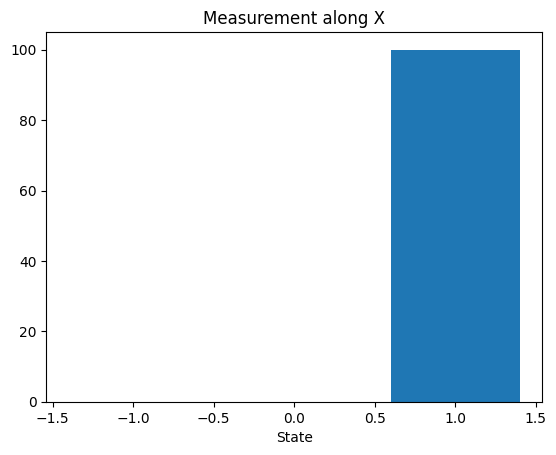

In [27]:
from qutip.measurement import measure, measurement_statistics

trials = 100

# Prepare |+⟩ state
psi1 = (basis(2,0) + basis(2,1) ).unit()

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')

for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure.
  Here the state is psi1 and the basis is along X.
  '''
  value, new_state = measure(psi1, sigmax())


  results[round(value)] += 1

  axes.plot(1, 1,'.w')
  axes.plot(1, -1,'.w')
  if value > 0:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along X')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along X')
plt.xlabel('State')
plt.show()


# axes.set_xlabel(r't [$\pi$]', fontsize=20)
# axes.set_ylabel(r'spin state', fontsize=20)

# axes.legend(("Up=blue", "Down=red"),loc=2)


We've shown a very interesting connection between the real 3D world and this quantum state world in that they both fit on the Bloch sphere.
Measuring states along X or Y in real space can be respresented by superposition of vectors on the Bloch sphere.

To dig deeper you can look into the fact that SU(2) is isomorphic to SO(3).

SU(2) - Special Unitary group (degree 2) - vector state space of qubits on the Bloch sphere.

SO(3) - Special orthogonal group in 3 Dimensions - directions in 3D, aka a real sphere.

https://en.wikipedia.org/wiki/Special_unitary_group#The_group_SU(2)



# Stern Gerlach Experiment

Let us prepare electrons in a random orientation of spin as if they are all from some thermal source.

Then by applying a magnetic field we measure them along the axis of that field. That field becomes the 'quantization' axis.

{1.0: 46, -1.0: 54}


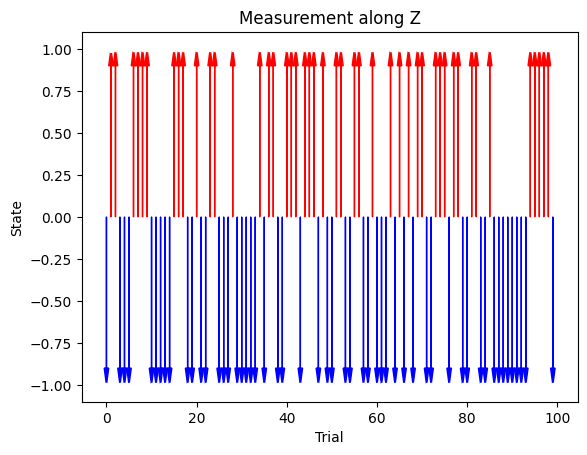

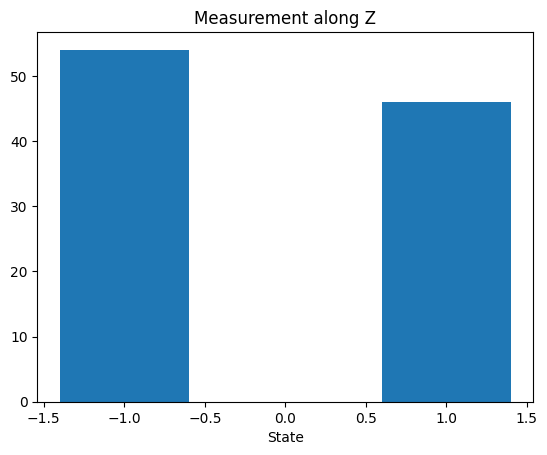

In [28]:
from qutip.measurement import measure, measurement_statistics

trials = 100

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')

b = Bloch()
b.vector_width = 1
b.vector_color = ["#{:x}0{:x}0ff".format(i, i) for i in range(10)]

for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure.
  Here the state is psi1 and the basis is along X.
  '''

  # Prepare random state for each trial
  # Random relative phase = np.exp(-1j*2*pi*random.rand())

  psi1 = (random.rand()*basis(2,0) + np.exp(-1j*2*pi*random.rand())*random.rand()*basis(2,1) ).unit()
  # print(psi1)

  #Add the state to the Bloch Sphere 'before' measurement
  b.add_states(psi1)


  value, new_state = measure(psi1, sigmaz())

  results[round(value)] += 1
  axes.plot(1, 1,'.w')
  axes.plot(1, -1,'.w')
  if value > 0:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)



print(results)
plt.title('Measurement along Z')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along Z')
plt.xlabel('State')
plt.show()


# axes.set_xlabel(r't [$\pi$]', fontsize=20)
# axes.set_ylabel(r'spin state', fontsize=20)

# axes.legend(("Up=blue", "Down=red"),loc=2)


### Initial random states (thermal source)

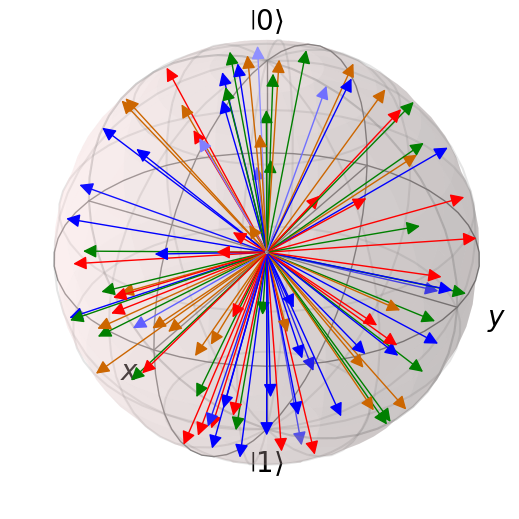

In [29]:
b.show()

{1.0: 26, -1.0: 21}


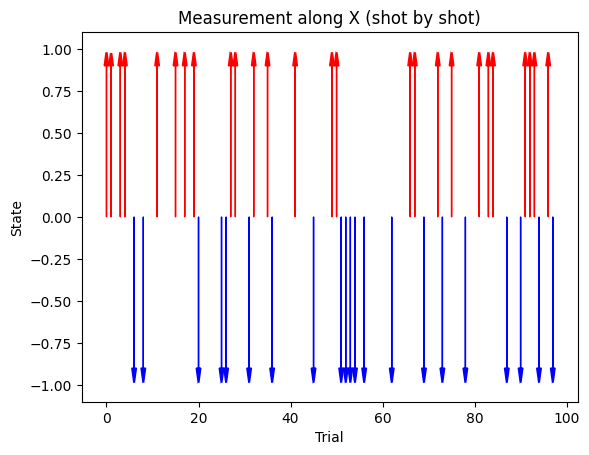

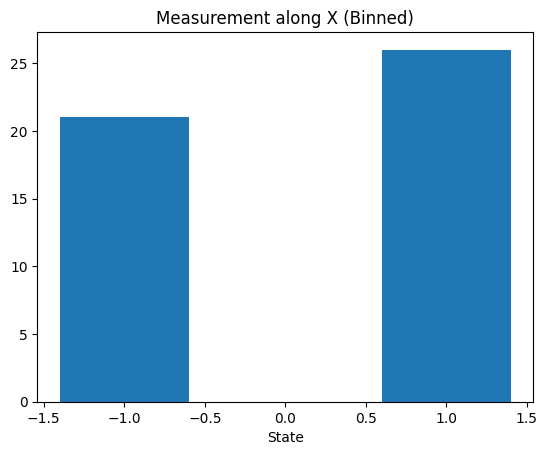

In [30]:
from qutip.measurement import measure, measurement_statistics

trials = 100

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')

b = Bloch()
b.vector_width = 1
b.vector_color = ["#{:x}0{:x}0ff".format(i, i) for i in range(10)]

b2 = Bloch()

b3 = Bloch()

b4 = Bloch()


for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure.
  Here the state is psi1 and the basis is along X.
  '''

  # Prepare random state for each trial
  # Random relative phase = np.exp(-1j*2*pi*random.rand())

  psi1 = (random.rand()*basis(2,0) + np.exp(-1j*2*pi*random.rand())*random.rand()*basis(2,1) ).unit()
  # print(psi1)

  #Add the state to the Bloch Sphere 'before' measurement
  b.add_states(psi1)

  #Measure in Z basis
  value, new_state_z = measure(psi1, sigmaz())

  #Add the state to the Bloch Sphere 'after' measurement in Z basis
  b2.add_states(new_state_z)

  '''
  Polarization!!!!
  Block all of the spin down atoms
  '''
  if value < 0 :
    continue # contine with the next loop if the spin is negative

  #Add the state to the Bloch Sphere 'after' polarization in Z basis
  b3.add_states(new_state_z)

  #Measure in X basis
  value_x, new_state_x = measure(new_state_z, sigmax())

  #Add the state to the Bloch Sphere 'after' measurement in X basis
  b4.add_states(new_state_x)


  results[round(value_x)] += 1
  axes.plot(1, 1,'.w')
  axes.plot(1, -1,'.w')

  if value_x > 0:
    axes.plot(i, value_x,'.w')
    plt.arrow(i,0,0,value_x,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value_x,'.w')
    plt.arrow(i,0,0,value_x,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)



# b.render()

# b2.render()

# b3.render()

# b4.render()

print(results)
plt.title('Measurement along X (shot by shot)')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along X (Binned)')
plt.xlabel('State')
plt.show()


# axes.set_xlabel(r't [$\pi$]', fontsize=20)
# axes.set_ylabel(r'spin state', fontsize=20)

# axes.legend(("Up=blue", "Down=red"),loc=2)


### Initial spin states (thermal)

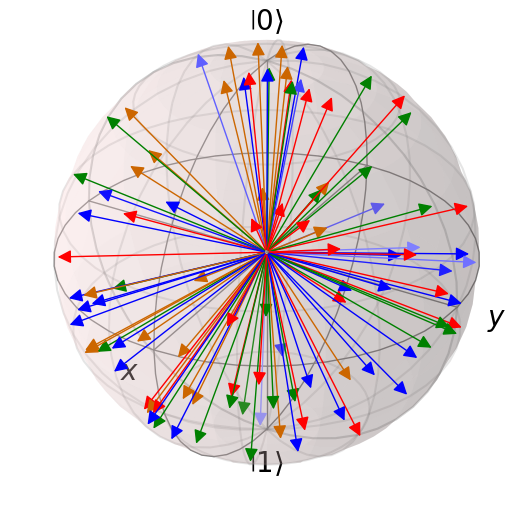

In [31]:
b.show()

### After Stern Gerlach Separation along Z

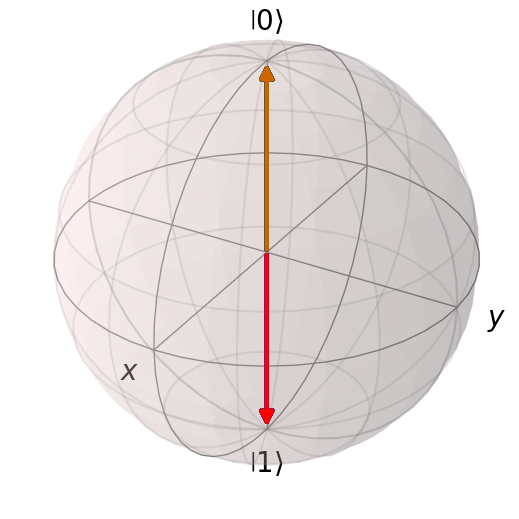

In [32]:
b2.show()

### After polarizing the beam of atoms (blocking all of the spin down atoms)

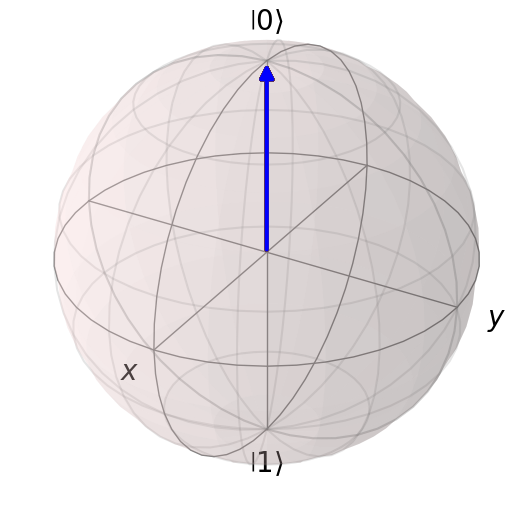

In [33]:
b3.show()

### State after applying gradient along X (measuring in X basis)

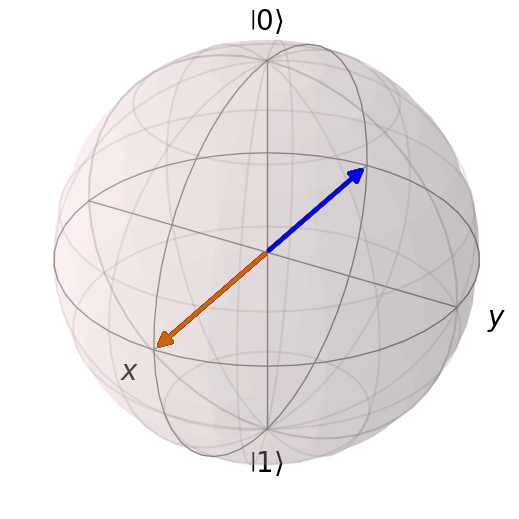

In [34]:
b4.show()

###Exercises:
* Verify that a few superpositions you create with arbitrary rotation about the Bloch sphere match the measured probabilities of being in each state.

* Create an equal 50/50 superposition of up and down. Rotate this superposition around the Z axis. Does it change the probabilities?

* When would rotation about the Z axis matter? What is the physical analog to the Mach Zehnder interferometer?

* Recreate the Stern Gerlach Experiment with:
  * Z quantization
  * Remove all the spin down states (polarizing to $|0⟩_Z$)
  * X quantization
  * Polarize to $|-⟩_X$
  * Y quantization
  * Polarize to $|-i⟩_Y$
* How many qubits make it through? How many should you expect to make it through?
* What is the relative phase of the final Y states?
* How can you measure their relative phase?





#References:

https://qutip.org/docs/latest/guide/guide-bloch.html


https://en.wikipedia.org/wiki/Hilbert_space#Quantum_mechanics



#END of LAB 2

We start by finding the matrix representation of the X-axis rotation operator with angle 𝜃= −𝜋/2. This operator is given by:

$$ R_x(-\frac{\pi}{2}) = \begin{pmatrix} \cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \ -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & -i \ -i & 1 \end{pmatrix} $$

where we have used the fact that $\cos(-\frac{\pi}{2})=0$ and $\sin(-\frac{\pi}{2})=-1$.

To apply this operator to the state $|0\rangle=\begin{pmatrix}1 \ 0\end{pmatrix}$, we simply multiply the two matrices:

$$ R_x(-\frac{\pi}{2}) |0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & -i \ -i & 1 \end{pmatrix}\begin{pmatrix}1 \ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \ -i\end{pmatrix} = |1\rangle $$

Therefore, the rotation of angle 𝜃= −𝜋/2 about the X axis on the Bloch sphere transforms the state $|0\rangle$ into $|1\rangle$. Geometrically, this corresponds to a quarter-turn of the Bloch sphere around the X axis, which maps the north pole $|0\rangle$ to the equator, and the equator to the south pole $|1\rangle$.